# 3.1 Analyze Articles
This notebook analyzes the cleaned article data in preparation for modeling. The ultimate goal is to match cleaned articles to the products based on their cleaned product data.

In [ ]:
import pandas as pd

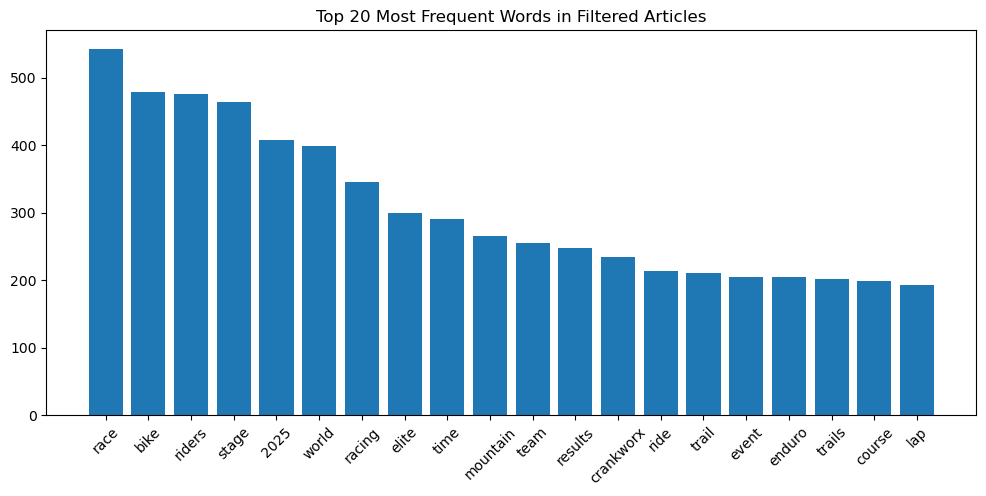

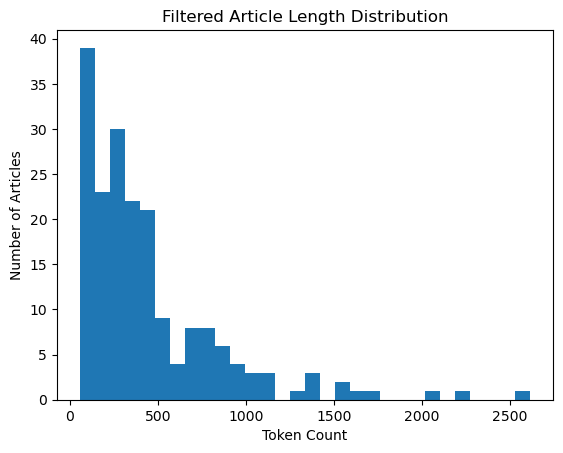

Article 0 tokens: ['must', 'watch', 'huge', 'bmx', 'sends', 'max', 'millers', 'serenity', 'blood', 'sweat', 'spilled', 'skin', 'sacrificed', 'heart', 'soul', 'bared', 'bones', 'broke', 'max', 'miller']
Article 1 tokens: ['podcast', 'round', 'tahnée', 'seagrave', 'speedsuits', 'ken', 'roczen', 'mtb', 'mike', 'levy', 'talks', 'scorpions', 'podcasts', 'filling', 'earbuds', 'last', 'little', 'while', 'let', 'us']
Article 2 tokens: ['crankworx', 'announces', 'details', '2025', 'cairns', 'festival', 'teases', 'event', 'format', 'press', 'release', 'crankworx', 'photos', 'clint', 'trahan', 'crankworx', 'cairns', 'gearing', '2025', 'edition']


In [51]:
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Load article data
with open("data/article-data-cleaned.json") as f:
    article_data = json.load(f)

manual_stopwords = {
    "the", "and", "a", "to", "of", "in", "is", "it", "you", "that", "this", "on", "for", "with", "as",
    "was", "but", "are", "they", "at", "be", "from", "by", "an", "or", "not", "have", "we", "has",
    "q", "ti", "one", "get", "right", "full", "go", "can", "do", "i", "our", "your", "all", "out", 
    "what", "want", "just", "were", "into", "his", "like", "two", "so", "their", "after", "some", "day", 
    "new", "also", "will", "more", "who", "over", "back", "been", "its", "up", "first", "top", "there",
    "how", "now", "only", "off", "about", "1st", "2nd", "3rd", "no", "1", "best", "year", "4th", "he",
    "here", "good", "place", "which", "than", "three", "if", "through", "cup", "seconds"
}

# Tokenize all articles
raw_documents = article_data["documents"]
raw_ids = article_data["ids"]

# Set token length limits
MIN_TOKENS = 50
MAX_TOKENS = 3000

# Process: filter and truncate
filtered_ids = []
filtered_tokens = []
for idx, doc in enumerate(raw_documents):
    tokens = [token for token in re.findall(r'\b\w+\b', doc.lower()) if token not in manual_stopwords]
    if MIN_TOKENS <= len(tokens) <= MAX_TOKENS:
        filtered_ids.append(raw_ids[idx])
        filtered_tokens.append(tokens)
    elif len(tokens) > MAX_TOKENS:
        # Optional: truncate instead of removing
        filtered_ids.append(raw_ids[idx])
        filtered_tokens.append(tokens[:MAX_TOKENS])

# Flatten for word count
all_tokens = [token for tokens in filtered_tokens for token in tokens]

# Count token frequency
counter = Counter(all_tokens)
most_common = counter.most_common(20)

# Plot top tokens
words, counts = zip(*most_common)
plt.figure(figsize=(12, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Filtered Articles")
plt.show()

# Length distribution (after filtering/truncation)
lengths = [len(tokens) for tokens in filtered_tokens]
plt.hist(lengths, bins=30)
plt.title("Filtered Article Length Distribution")
plt.xlabel("Token Count")
plt.ylabel("Number of Articles")
plt.show()

# Preview some example token lists
for i in range(3):
    print(f"Article {i} tokens:", filtered_tokens[i][:20])


## Next Step
After you have completed your article analysis here, run the next step in the workflow [03-02-AnalyzeProducts.ipynb](./03-02-AnalyzeProducts.ipynb) or go back to [00-Workflow.ipynb](./00-Workflow.ipynb).

---

**Authors:**
[Salah Mohamoud](mailto:salah.mohamoud.dev@gmail.com),
[Sai Keertana Lakku](mailto:saikeertana005@gmail.com),
[Zhen Zhuang](mailto:zhuangzhen17cs@gmail.com),
[Nick Capaldini](mailto:nick.capaldini@ridethenextwave.com), Ride The Next Wave, May 19, 2025

---